# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Preprocess Data

In [2]:
df = pd.read_csv('../playground-series-s4e2/train.csv')
df.drop('id', axis=1, inplace = True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Encode multicategorical features (one-hot encoding) and label encode the target variable
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'NObeyesdad'

# Label Encoding for the target (multi-class)
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# One-hot encoding for multicategorical features
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Scales numerical features
scaler = StandardScaler()

# List numerical columns to scale
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Features and target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Store Accuracy Scores

In [4]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,)#decision tree 
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=2)


# Store the accuracy scores
accuracy_scores = []

# Define models in a dictionary for easy access
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Logistic Regression': lr,
}

# Angel Part(KNN)

In [5]:
# trains model
knn.fit(X_train,y_train)

# prediction 
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy in k = {5}: {accuracy_knn * 100:.2f}%")

accuracy_scores.append(accuracy_knn)

Accuracy in k = 5: 77.17%


# Tony Part(Decision Tree)

In [6]:
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt * 100:.2f}%")

accuracy_scores.append(accuracy_dt)

Accuracy of Decision Tree: 85.40%


# Santi Part(Random Forest):

In [7]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf * 100:.2f}%")

accuracy_scores.append(accuracy_rf)

Accuracy of Random Forest: 89.81%


# Shambavi Part(Multinomial Logistic Regression)

In [8]:
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Multinomial Logistic Regression: {accuracy_lr * 100:.2f}%")

accuracy_scores.append(accuracy_lr)

Accuracy of Multinomial Logistic Regression: 86.39%


# Visualize Data

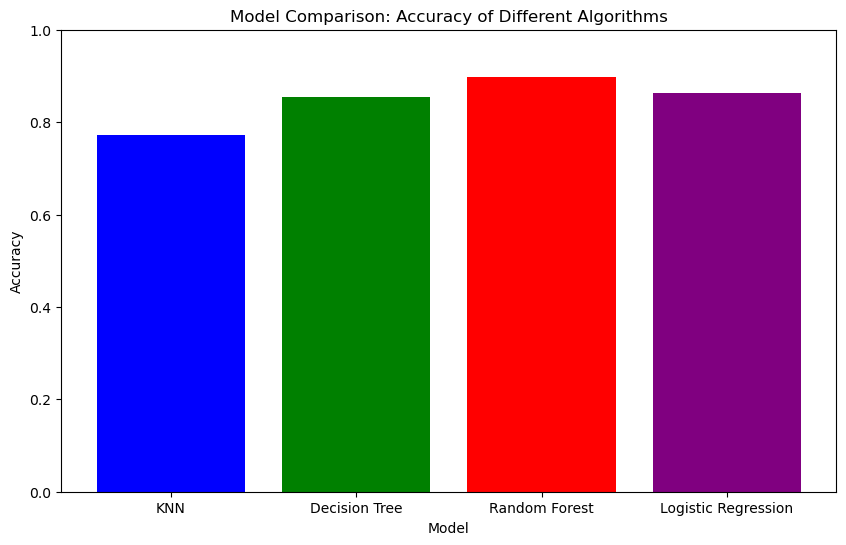

In [9]:
# Create a bar plot to compare the accuracy of models
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.show()

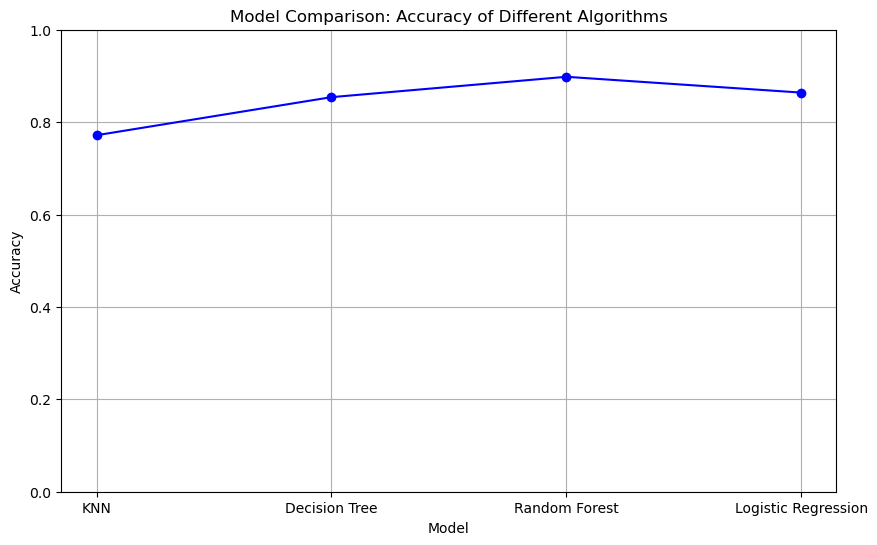

In [10]:
# Create a line plot to compare the accuracy of models
plt.figure(figsize=(10, 6))
plt.plot(models.keys(), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.grid(True)
plt.show()